In [87]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
import pandas as pd
import import_ipynb
from matplotlib import pyplot as plt

In [25]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [26]:
cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [35]:
#remove_outliers, clean_duration, clean_date, clean_stops
import Data_preprocessing_2 as preprocessing

In [48]:
flights_csv = 'flight_LAX_ATL_data_0601_0831.csv'

flights = pd.read_csv(flights_csv)

In [49]:
flights

,Price,Company Name,Stops,Duration,Destination,From,Date
0,254,American Airlines,nonstop,4h 38m,ATL,LAX,6/1/23
1,73,Spirit Airlines,1 stop,25h 28m,ATL,LAX,6/1/23
2,209,American Airlines,1 stop,6h 15m,ATL,LAX,6/1/23
3,159,United Airlines,1 stop,6h 55m,ATL,LAX,6/1/23
4,204,United Airlines,1 stop,6h 10m,ATL,LAX,6/1/23
...,...,...,...,...,...,...,...
34809,1174,"Avianca, JetBlue",3 stops,32h 56m,ATL,LAX,8/31/23
34810,1174,"Avianca, JetBlue",3 stops,37h 39m,ATL,LAX,8/31/23
34811,1201,"Avianca, JetBlue",3 stops,37h 39m,ATL,LAX,8/31/23
34812,1174,"Avianca, JetBlue",3 stops,38h 34m,ATL,LAX,8/31/23


In [50]:
flights['Duration'] = preprocessing.clean_duration(flights['Duration'])
flights['Date'] = preprocessing.clean_date(flights['Date'])
flights['Stops'] = flights['Stops'].apply(preprocessing.clean_stops).astype(float).fillna(-1).astype(int)
flights['Stops'] = flights['Stops'].replace(-1, '')

flights = flights[flights['Stops'] != '']

In [51]:
flights

,Price,Company Name,Stops,Duration,Destination,From,Date
0,254,American Airlines,0,278,ATL,LAX,2023-06-01
1,73,Spirit Airlines,1,1528,ATL,LAX,2023-06-01
2,209,American Airlines,1,375,ATL,LAX,2023-06-01
3,159,United Airlines,1,415,ATL,LAX,2023-06-01
4,204,United Airlines,1,370,ATL,LAX,2023-06-01
...,...,...,...,...,...,...,...
34809,1174,"Avianca, JetBlue",3,1976,ATL,LAX,2023-08-31
34810,1174,"Avianca, JetBlue",3,2259,ATL,LAX,2023-08-31
34811,1201,"Avianca, JetBlue",3,2259,ATL,LAX,2023-08-31
34812,1174,"Avianca, JetBlue",3,2314,ATL,LAX,2023-08-31


In [52]:
'''
COMES FROM "Data preprocessing-2"
NEED TO WRAP INTO FUNCTION
'''

import re

# Remove leading and trailing whitespace
flights['Company Name'] = flights['Company Name'].str.strip()

# Remove punctuation
flights['Company Name'] = flights['Company Name'].str.replace('[^\w\s]', '')

# Remove extra whitespace within the company name
flights['Company Name'] = flights['Company Name'].str.replace('\s+', ' ')

<ipython-input-52-20acb649e9f1>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  flights['Company Name'] = flights['Company Name'].str.replace('[^\w\s]', '')
<ipython-input-52-20acb649e9f1>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  flights['Company Name'] = flights['Company Name'].str.replace('\s+', ' ')


In [53]:
flights

,Price,Company Name,Stops,Duration,Destination,From,Date
0,254,American Airlines,0,278,ATL,LAX,2023-06-01
1,73,Spirit Airlines,1,1528,ATL,LAX,2023-06-01
2,209,American Airlines,1,375,ATL,LAX,2023-06-01
3,159,United Airlines,1,415,ATL,LAX,2023-06-01
4,204,United Airlines,1,370,ATL,LAX,2023-06-01
...,...,...,...,...,...,...,...
34809,1174,Avianca JetBlue,3,1976,ATL,LAX,2023-08-31
34810,1174,Avianca JetBlue,3,2259,ATL,LAX,2023-08-31
34811,1201,Avianca JetBlue,3,2259,ATL,LAX,2023-08-31
34812,1174,Avianca JetBlue,3,2314,ATL,LAX,2023-08-31


In [54]:
'''
COMES FROM "Data preprocessing-2"
NEED TO WRAP INTO FUNCTION
'''

flights['Date'] = pd.to_datetime(flights['Date'])
flights['DayOfWeek'] = (flights['Date'].dt.dayofweek + 1) % 7
flights['Month'] = flights['Date'].dt.month

In [55]:
flights

,Price,Company Name,Stops,Duration,Destination,From,Date,DayOfWeek,Month
0,254,American Airlines,0,278,ATL,LAX,2023-06-01,4,6
1,73,Spirit Airlines,1,1528,ATL,LAX,2023-06-01,4,6
2,209,American Airlines,1,375,ATL,LAX,2023-06-01,4,6
3,159,United Airlines,1,415,ATL,LAX,2023-06-01,4,6
4,204,United Airlines,1,370,ATL,LAX,2023-06-01,4,6
...,...,...,...,...,...,...,...,...,...
34809,1174,Avianca JetBlue,3,1976,ATL,LAX,2023-08-31,4,8
34810,1174,Avianca JetBlue,3,2259,ATL,LAX,2023-08-31,4,8
34811,1201,Avianca JetBlue,3,2259,ATL,LAX,2023-08-31,4,8
34812,1174,Avianca JetBlue,3,2314,ATL,LAX,2023-08-31,4,8


In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [57]:
def preprocess(df):

  le = LabelEncoder()

  #df = df.dropna()
  df['Date'] = le.fit_transform(df['Date'])
  df['Company Name'] = le.fit_transform(df['Company Name'])
  #df['Stops'] = le.fit_transform(df['Stops'])

  #df['Price'] = df['Price'].str[1:].str.replace(',','').astype(int)
  #df['Price'] = normalize(np.array(df['Price']).reshape(1,-1)).flatten()

preprocess(flights)

In [63]:
X = flights[['Date', 'Company Name', 'Stops', 'Duration', 'DayOfWeek', 'Month']]
X = np.array(X)
y = flights['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [64]:
X

array([[   0,    3,    0,  278,    4,    6],
       [   0,   13,    1, 1528,    4,    6],
       [   0,    3,    1,  375,    4,    6],
       ...,
       [  90,    5,    3, 2259,    4,    8],
       [  90,    5,    3, 2314,    4,    8],
       [  90,    5,    3, 2314,    4,    8]])

In [65]:
X_train.shape, y_train.shape

((27851, 6), (27851,))

In [77]:
model = tf.keras.models.Sequential([
    layers.Dense(500, activation = 'relu'),
    layers.Dropout(.2),
    layers.Dense(500, activation = 'relu'),
    layers.Dropout(.2),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(1)
])

In [78]:
model.compile(optimizer = 'adam', loss = 'huber')

In [88]:
history = model.fit(X_train, y_train, epochs = 20, verbose = 1, validation_split = .2)

Epoch 1/20
697/697 [==============================] - 11s 16ms/step - loss: 102.0949 - val_loss: 92.5101
Epoch 2/20
697/697 [==============================] - 10s 14ms/step - loss: 100.0185 - val_loss: 92.9372
Epoch 3/20
697/697 [==============================] - 8s 12ms/step - loss: 100.0361 - val_loss: 94.7189
Epoch 4/20
697/697 [==============================] - 11s 15ms/step - loss: 99.2212 - val_loss: 89.2261
Epoch 5/20
697/697 [==============================] - 10s 15ms/step - loss: 98.0427 - val_loss: 86.9799
Epoch 6/20
697/697 [==============================] - 12s 17ms/step - loss: 97.5608 - val_loss: 87.9553
Epoch 7/20
697/697 [==============================] - 9s 13ms/step - loss: 97.0652 - val_loss: 84.9754
Epoch 8/20
697/697 [==============================] - 10s 14ms/step - loss: 96.2247 - val_loss: 97.9780
Epoch 9/20
697/697 [==============================] - 11s 16ms/step - loss: 95.5328 - val_loss: 88.4543
Epoch 10/20
697/697 [==============================] - 8s 12ms/

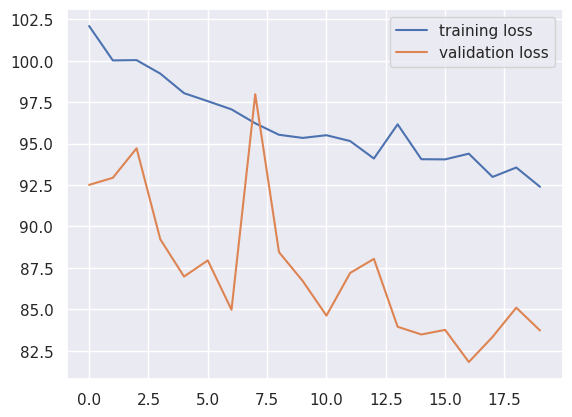

In [89]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()

In [90]:
model.evaluate(X_test, y_test, verbose = 2)

218/218 - 1s - loss: 84.8664 - 557ms/epoch - 3ms/step


84.86643981933594

In [91]:
preds = model.predict(X_test)[:20]

218/218 [==============================] - 1s 3ms/step


In [92]:
preds = preds.flatten()
preds

array([828.14166, 301.0917 , 211.48363, 385.2412 , 399.9017 , 369.7054 ,
       381.72165, 321.1669 , 207.25795, 892.7612 , 411.78348, 393.9258 ,
       405.2313 , 393.6648 , 289.63583, 431.60785, 361.36386, 336.15988,
       396.0143 , 350.7394 ], dtype=float32)

In [93]:
actual = np.array(y_test[:20])
actual

array([833, 248, 176, 344, 491, 403, 403, 308, 224, 933, 397, 323, 578,
       392, 262, 397, 239, 392, 325, 373])

In [94]:
preds - actual

array([  -4.8583374 ,   53.09170532,   35.48362732,   41.24121094,
        -91.09829712,  -33.29458618,  -21.27835083,   13.16690063,
        -16.74205017,  -40.23876953,   14.78347778,   70.92581177,
       -172.76870728,    1.66479492,   27.63583374,   34.60784912,
        122.36386108,  -55.84011841,   71.01431274,  -22.2605896 ])

(array([1.0000e+04, 1.5487e+04, 6.1380e+03, 2.7600e+03, 3.2700e+02,
        6.1000e+01, 2.1000e+01, 1.2000e+01, 4.0000e+00, 4.0000e+00]),
 array([  73. ,  297.6,  522.2,  746.8,  971.4, 1196. , 1420.6, 1645.2,
        1869.8, 2094.4, 2319. ]),
 <BarContainer object of 10 artists>)

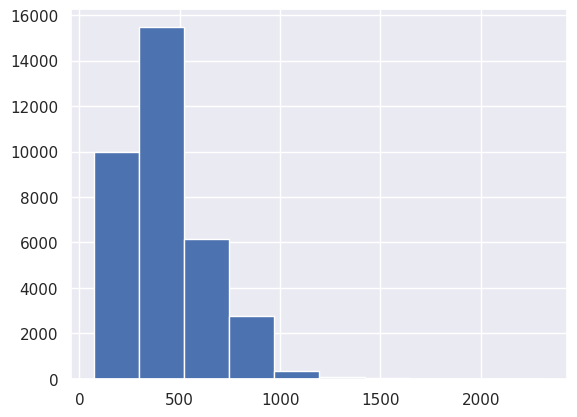

In [95]:
plt.hist(flights['Price'])

In [96]:
flights['Price'].min(), flights['Price'].max()

(73, 2319)